**Nama:** Ahmad Hamsa Pattuneri

**NIM:** H071201063

**MACHINE LEARNING**

# Importing Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Read The Dataset

In [ ]:
heart=pd.read_csv("/content/drive/MyDrive/Machine Learning/heart.csv")
saturation=pd.read_csv("/content/drive/MyDrive/Machine Learning/o2Saturation.csv")

In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Description

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
heart.shape

(303, 14)

In [ ]:
col=heart.columns
col

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Univariate Analysis

## Categorical and Target features

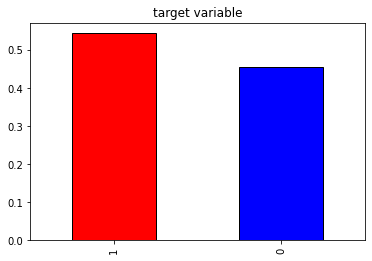

In [ ]:
heart['output'].value_counts(normalize=True).plot.bar(color=['red','blue'],edgecolor='black',title='target variable')

## Sex Feature

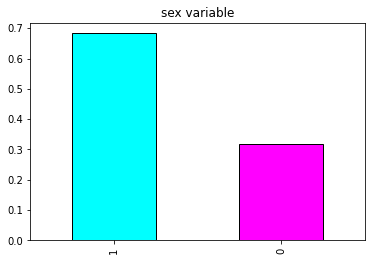

In [ ]:
heart['sex'].value_counts(normalize=True).plot.bar(color=['cyan','magenta'],edgecolor='black',title='sex variable')

## Chest Pain Feature

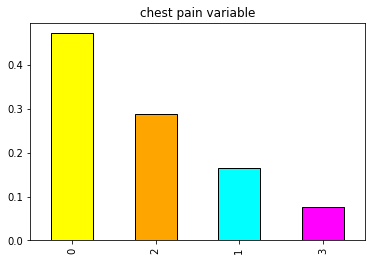

In [ ]:
heart['cp'].value_counts(normalize=True).plot.bar(color=['yellow','orange','cyan','magenta'],edgecolor='black',title='chest pain variable')

## exercise induced angina, fasting blood sugar > 120 mg/dl, resting electrocardiographic results, Slope

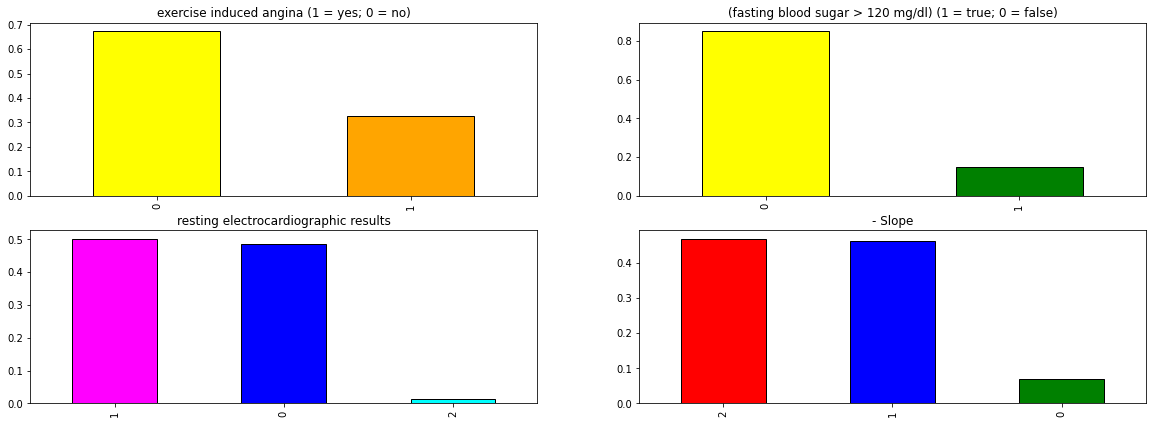

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(221)
heart['exng'].value_counts(normalize=True).plot.bar(color=['yellow','orange'],edgecolor='black',title='exercise induced angina (1 = yes; 0 = no)')
plt.subplot(222)
heart['fbs'].value_counts(normalize=True).plot.bar(color=['yellow','green'],edgecolor='black',title='(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.subplot(223)
heart['restecg'].value_counts(normalize=True).plot.bar(color=['magenta','blue','cyan'],edgecolor='black',title='resting electrocardiographic results')
plt.subplot(224)
heart['slp'].value_counts(normalize=True).plot.bar(color=['red','blue','green'],edgecolor='black',title='- Slope')

## Number of major vessels, Thalium Stress Test result ~ (0,3)

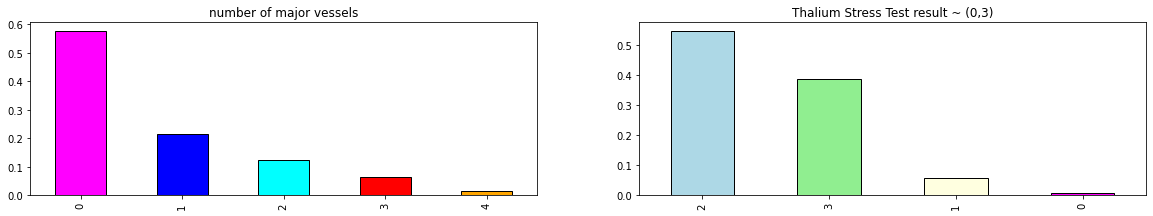

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(221)
heart['caa'].value_counts(normalize=True).plot.bar(color=['magenta','blue','cyan','red','orange'],edgecolor='black',title='number of major vessels')
plt.subplot(222)
heart['thall'].value_counts(normalize=True).plot.bar(color=['lightblue','lightgreen','lightyellow','magenta'],edgecolor='black',title='Thalium Stress Test result ~ (0,3)')

# Numerical features

In [ ]:
numerical_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

## Age , blood pressure , cholestoral , Heart Rate

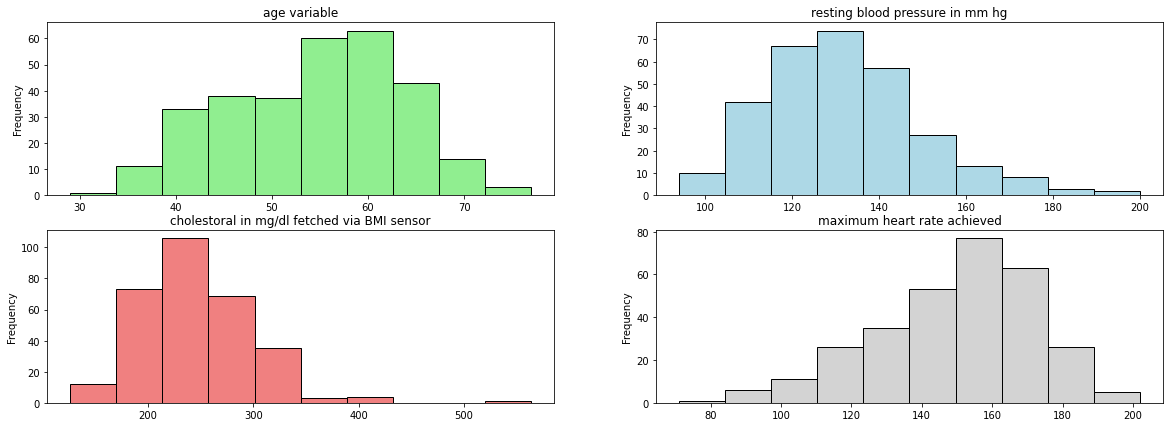

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(221)
heart['age'].plot.hist(edgecolor='black',color='lightgreen',title='age variable')
plt.subplot(222)
heart['trtbps'].plot.hist(edgecolor='black',color='lightblue',title='resting blood pressure in mm hg')
plt.subplot(223)
heart['chol'].plot.hist(edgecolor='black',color='lightcoral',title='cholestoral in mg/dl fetched via BMI sensor')
plt.subplot(224)
heart['thalachh'].plot.hist(edgecolor='black',color='lightgray',title='maximum heart rate achieved')

## Oldpeak

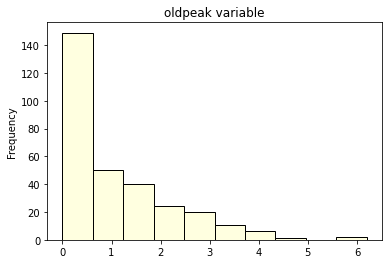

In [ ]:
heart['oldpeak'].plot.hist(edgecolor='black',color='lightyellow',title='oldpeak variable')

# Bivariate Analysis

## effect of age on heart attack

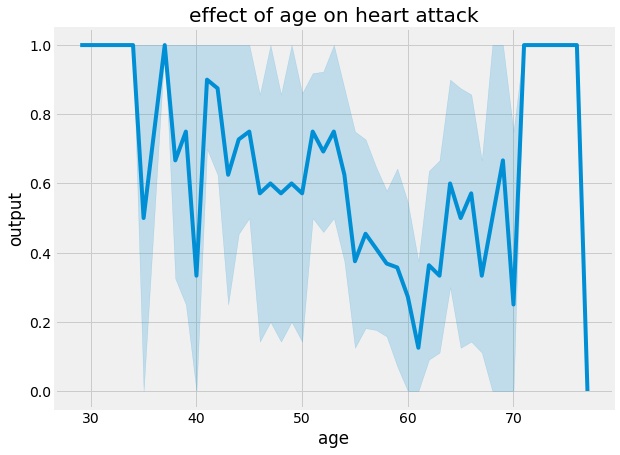

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart attack")
sns.lineplot(x=heart['age'],y=heart['output'])

## heart attack related with sex

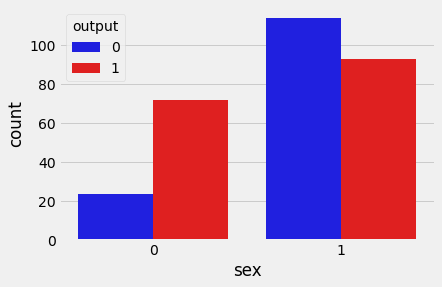

In [ ]:
sns.countplot(data=heart,x='sex',palette=["blue","red"], hue='output')

## heart attack related with chest pain

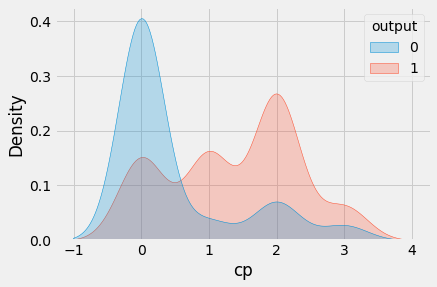

In [ ]:
sns.kdeplot(data=heart, x='cp',hue="output", fill=True)

## heart attack related with age

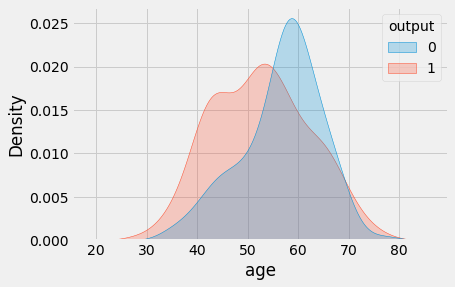

In [ ]:
sns.kdeplot(data=heart, x='age',hue="output", fill=True)

## heat attack realted with thalium stress test

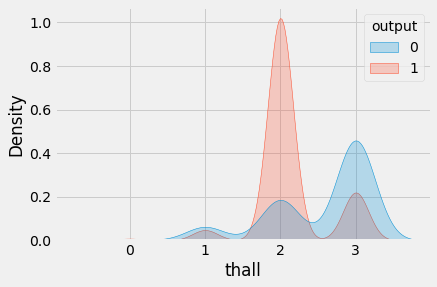

In [ ]:
sns.kdeplot(data=heart, x='thall',hue="output", fill=True)

## heat attack realted with Exercise induced angina

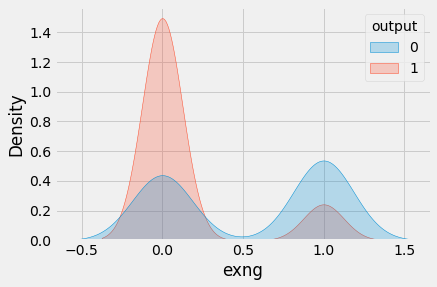

In [ ]:
sns.kdeplot(data=heart, x='exng',hue="output", fill=True)

## effect of age on blood pressure

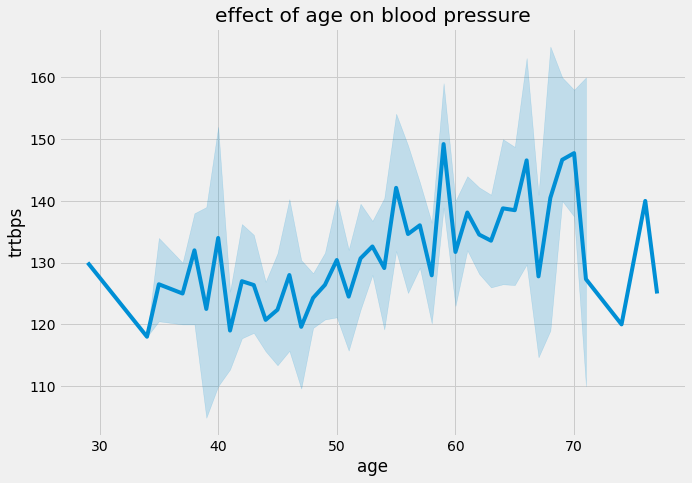

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on blood pressure")
sns.lineplot(x=heart['age'],y=heart['trtbps'])

## effect of age on cholestrol level

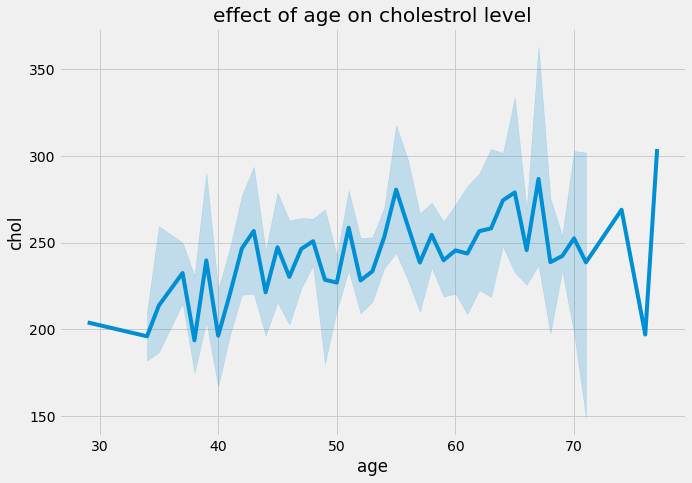

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on cholestrol level")
sns.lineplot(x=heart['age'],y=heart['chol'])

## effect of age on heart rate

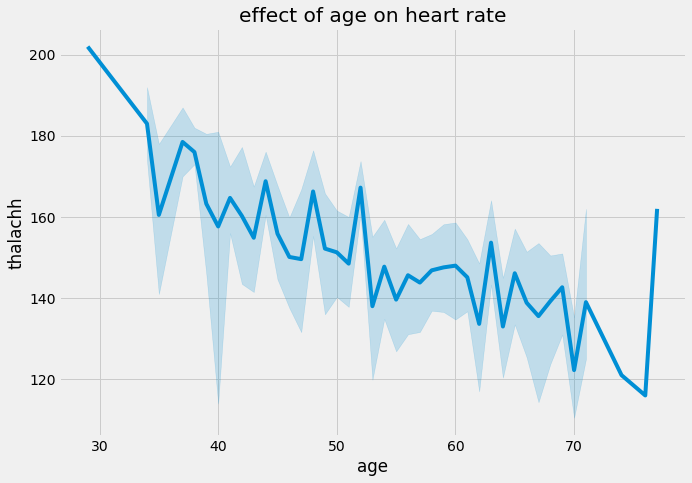

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart rate")
sns.lineplot(x=heart['age'],y=heart['thalachh'])

## How does incresed heart rate and age affect the heart attack

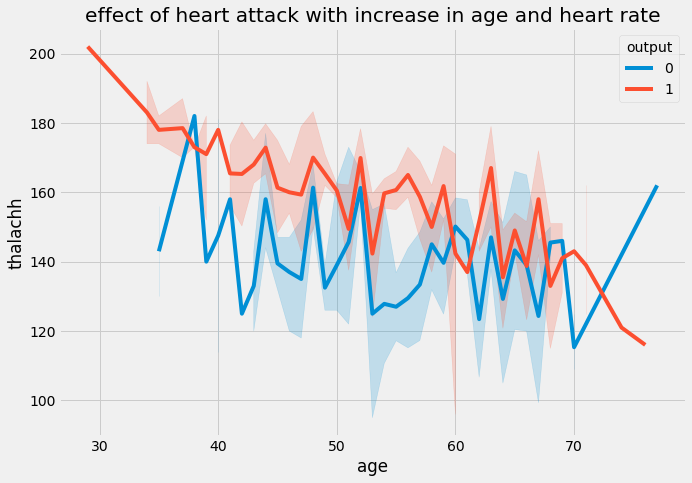

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and heart rate")
sns.lineplot(x=heart['age'],y=heart['thalachh'],hue=heart['output'])

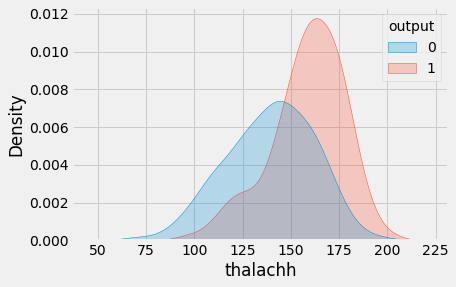

In [ ]:
sns.kdeplot( data=heart, x='thalachh',hue="output",fill=True)

## How does incresed cholestrol and age affect the heart attack

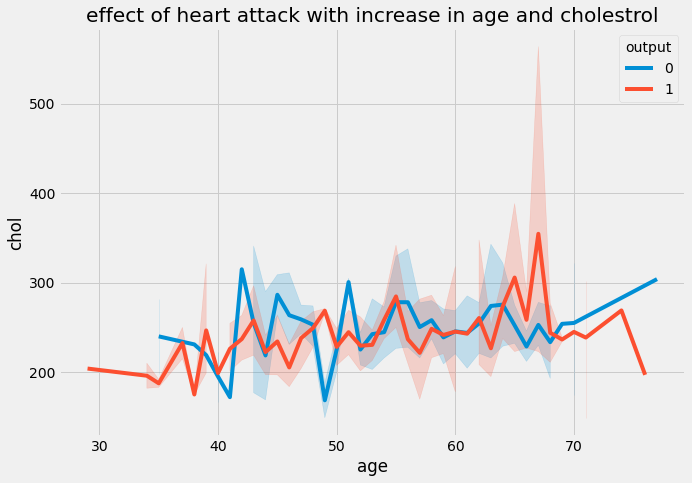

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and cholestrol")
sns.lineplot(x=heart['age'],y=heart['chol'],hue=heart['output'])

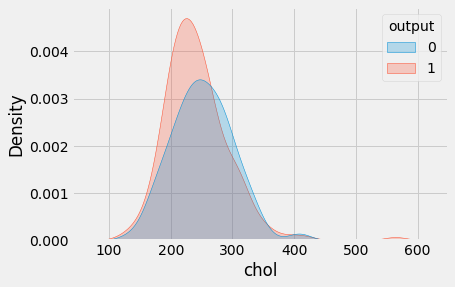

In [ ]:
sns.kdeplot( data=heart, x='chol',hue="output",fill=True)

## How does incresed blood pressure and age affect the heart attack

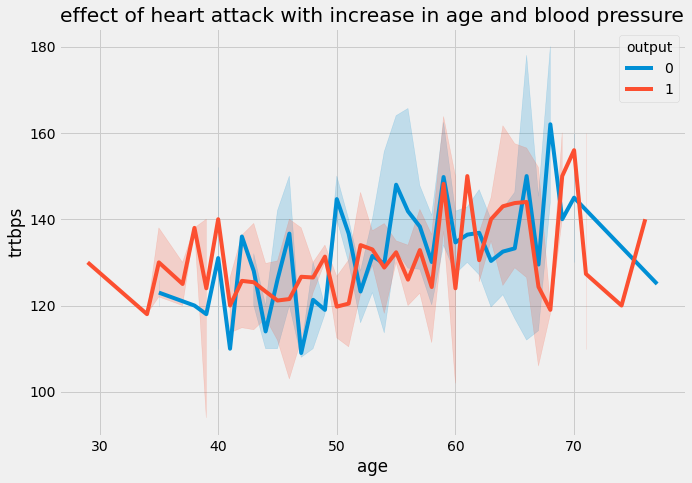

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and blood pressure")
sns.lineplot(x=heart['age'],y=heart['trtbps'],hue=heart['output'])

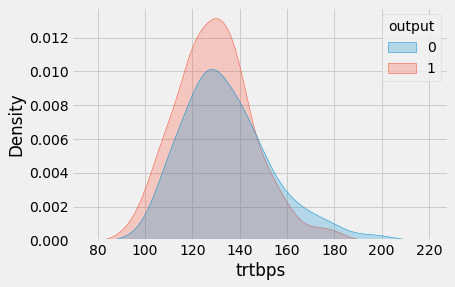

In [ ]:
sns.kdeplot( data=heart, x='trtbps',hue="output",fill=True)

# Model Building

In [ ]:
target=heart['output']
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [ ]:
heart.drop(['output'],axis=1,inplace=True)
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Checking for skewness

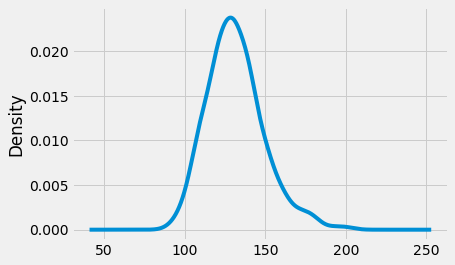

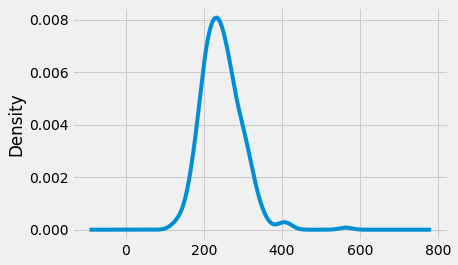

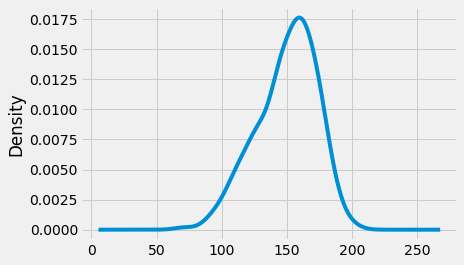

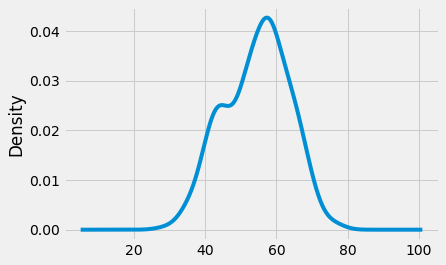

In [ ]:
heart['trtbps'].plot(kind='density')
plt.show()
heart['chol'].plot(kind='density')
plt.show()
heart['thalachh'].plot(kind='density')
plt.show()
heart['age'].plot(kind='density')
plt.show()

In [ ]:
heart.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


## Robust Scaler

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(heart)
robust_df = pd.DataFrame(robust_df, columns =['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])
robust_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,-0.5,0.50,0.015748,0.0,0.0,-0.923077,1.0,-0.3750,0.0,0.0,1.0
299,-0.740741,0.0,1.0,-1.00,0.377953,0.0,0.0,-0.646154,0.0,0.2500,0.0,0.0,1.0
300,0.962963,0.0,-0.5,0.70,-0.740157,1.0,0.0,-0.369231,0.0,1.6250,0.0,2.0,1.0
301,0.148148,0.0,-0.5,0.00,-1.716535,0.0,0.0,-1.169231,1.0,0.2500,0.0,1.0,1.0


## Standard Scaler

In [ ]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(robust_df)
standard_df = pd.DataFrame(standard_df, columns =['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])

In [ ]:
standard_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


## Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(heart,target,test_size=0.1,random_state=42)

# Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
d_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train,y_train)*100,2)
print(f'{acc_decision_tree}%')

100.0%


In [ ]:
from sklearn.metrics import accuracy_score

print('Decision Tree model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, d_pred)))

Decision Tree model accuracy score: 0.7742


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

In [ ]:
features=heart.columns
features

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

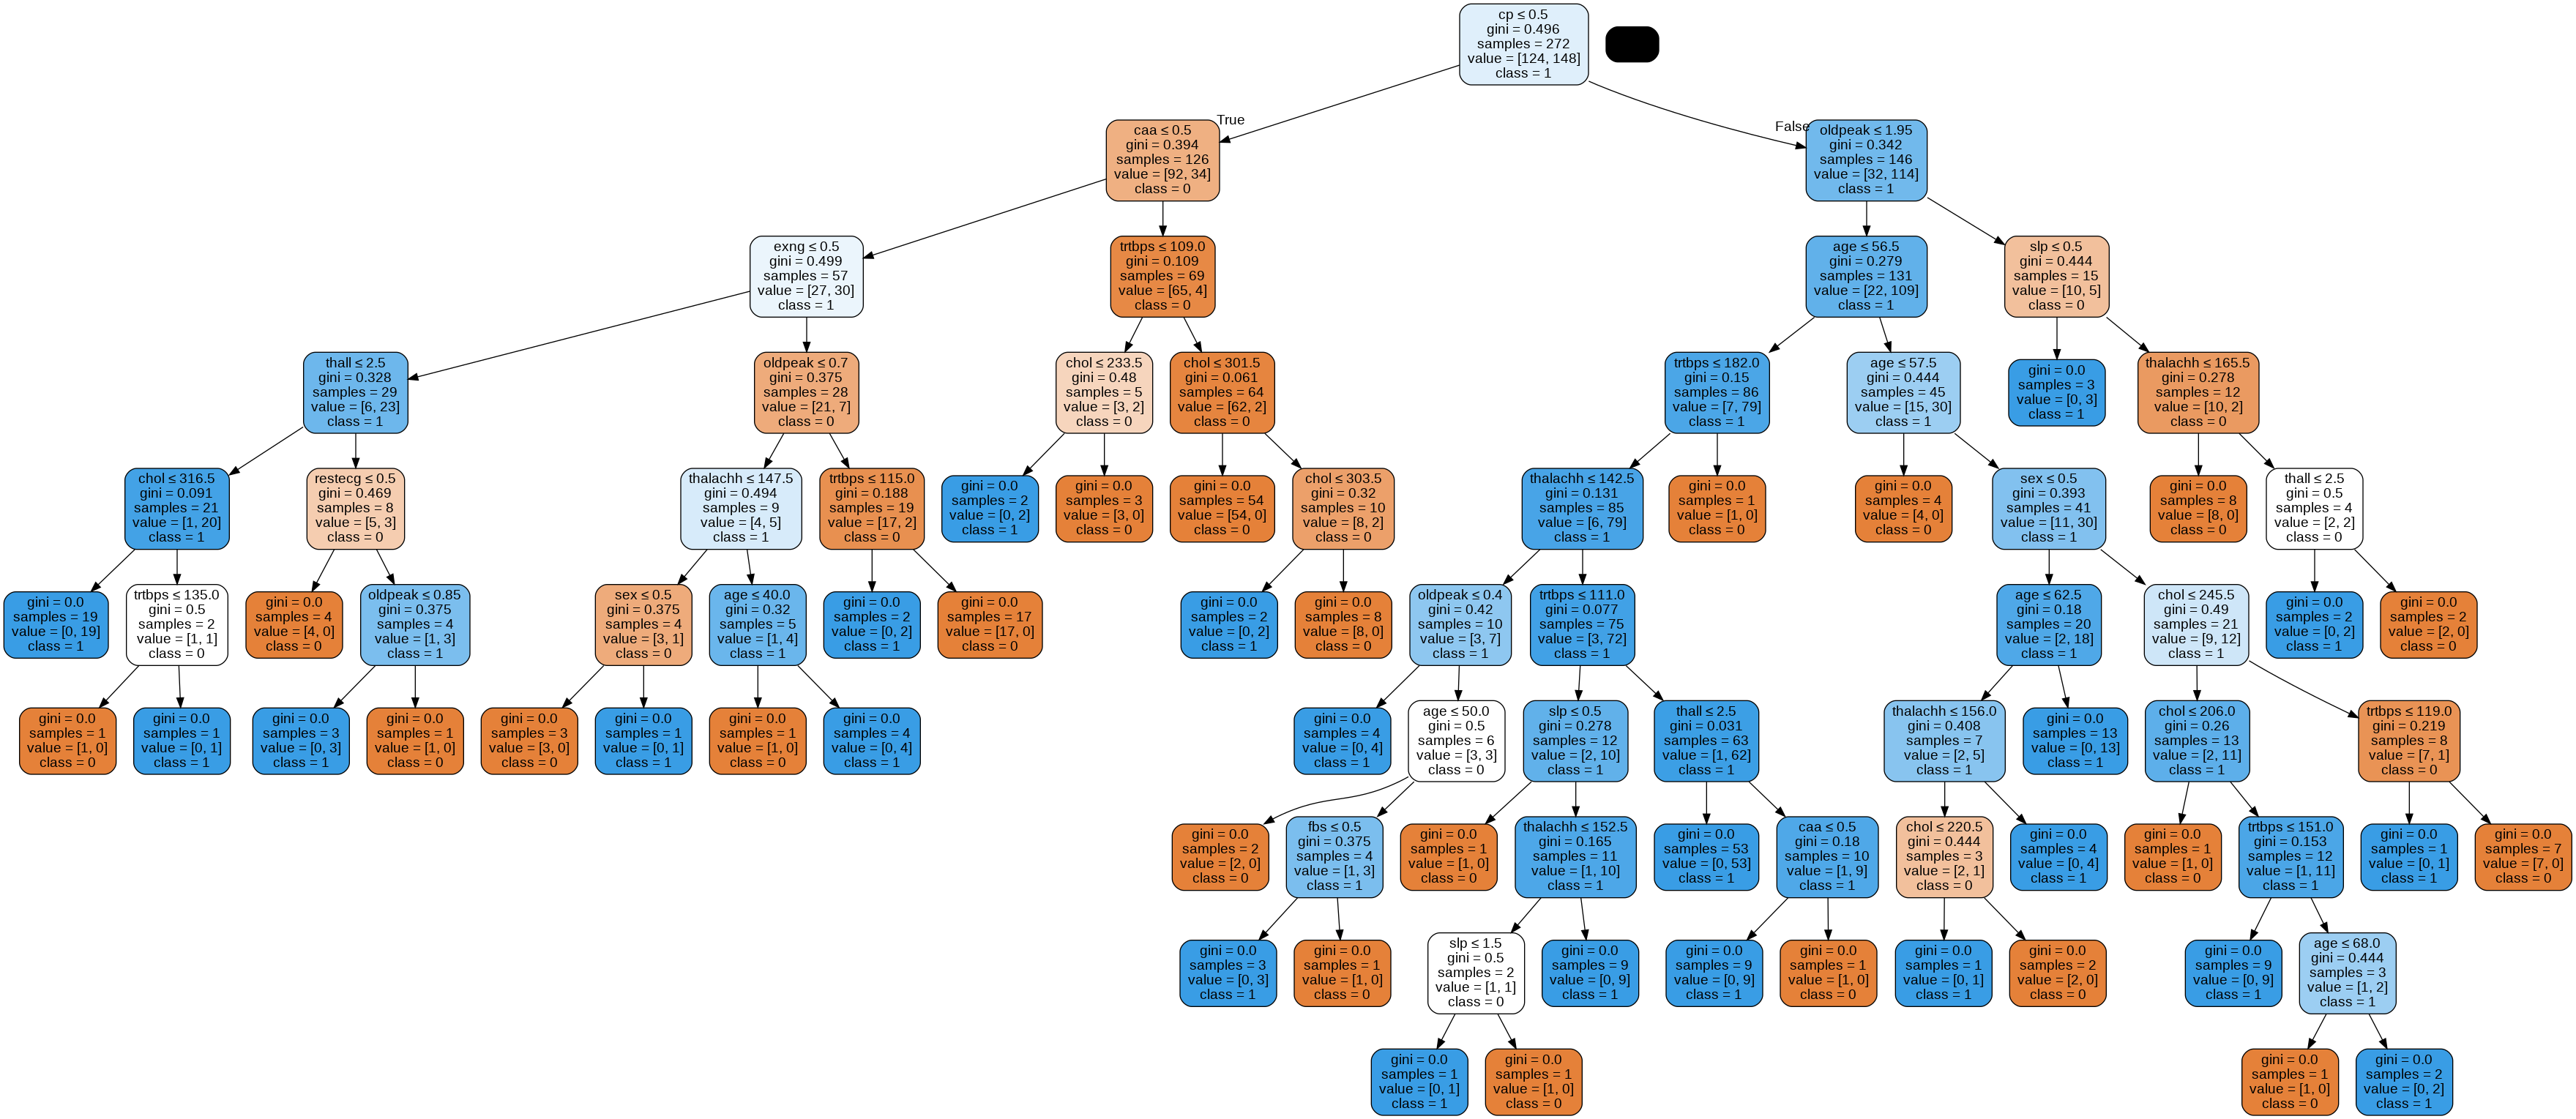

In [ ]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_failure.png')
Image(graph.create_png())